In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras

In [59]:
random_state = 100

In [60]:
data = pd.read_csv('Bias_correction_ucl.csv')

# TODO fix it
data.drop('Date', axis='columns', inplace=True)
# data['Date'] = pd.to_datetime(data['Date'])

data = data.dropna()

y_Tmax = data['Next_Tmax']
y_Tmin = data['Next_Tmin']
X = data.drop(['Next_Tmax', 'Next_Tmin'], axis='columns')

print(X.shape, y_Tmax.shape, y_Tmin.shape)
X.head()

(7588, 22) (7588,) (7588,)


,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y_Tmax, test_size=0.2, shuffle=True, random_state=random_state)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=100)

In [67]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [70]:
models = {}

In [71]:
model = Sequential([
    Dense(23,input_shape=(22,), activation='relu'),
    # We want output layer to have full range of values
    Dense(1, activation='linear')   
])
models['Dense(23, 1)'] = model
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 23)                529       
_________________________________________________________________
dense_81 (Dense)             (None, 1)                 24        
Total params: 553
Trainable params: 553
Non-trainable params: 0
_________________________________________________________________


In [72]:
model = Sequential([
    Dense(23,input_shape=(22,), activation='relu'),
    Dense(5, activation='relu'),

    # We want output layer to have full range of values
    Dense(1, activation='linear')   
])
models['Dense(23, 5, 1)'] = model
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 23)                529       
_________________________________________________________________
dense_83 (Dense)             (None, 5)                 120       
_________________________________________________________________
dense_84 (Dense)             (None, 1)                 6         
Total params: 655
Trainable params: 655
Non-trainable params: 0
_________________________________________________________________


In [73]:
model = Sequential([
    Dense(23,input_shape=(22,), activation='relu'),
    Dense(10, activation='relu'),

    # We want output layer to have full range of values
    Dense(1, activation='linear')   
])
models['Dense(23, 10, 1)'] = model
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 23)                529       
_________________________________________________________________
dense_86 (Dense)             (None, 10)                240       
_________________________________________________________________
dense_87 (Dense)             (None, 1)                 11        
Total params: 780
Trainable params: 780
Non-trainable params: 0
_________________________________________________________________


In [74]:
model = Sequential([
    Dense(23,input_shape=(22,), activation='relu'),
    Dense(5, activation='relu'),
    Dense(5, activation='relu'),
    # We want output layer to have full range of values
    Dense(1, activation='linear')   
])
models['Dense(23, 5, 5, 1)'] = model
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 23)                529       
_________________________________________________________________
dense_89 (Dense)             (None, 5)                 120       
_________________________________________________________________
dense_90 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_91 (Dense)             (None, 1)                 6         
Total params: 685
Trainable params: 685
Non-trainable params: 0
_________________________________________________________________


In [75]:
model = Sequential([
    Dense(23,input_shape=(22,), activation='relu'),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    # We want output layer to have full range of values
    Dense(1, activation='linear')   
])
models['Dense(23, 10, 10, 1)'] = model
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_92 (Dense)             (None, 23)                529       
_________________________________________________________________
dense_93 (Dense)             (None, 10)                240       
_________________________________________________________________
dense_94 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_95 (Dense)             (None, 1)                 11        
Total params: 890
Trainable params: 890
Non-trainable params: 0
_________________________________________________________________


In [76]:
model = Sequential([
    Dense(23,input_shape=(22,), activation='relu'),
    Dense(5, activation='relu'),
    Dense(5, activation='relu'),
    Dense(5, activation='relu'),
    # We want output layer to have full range of values
    Dense(1, activation='linear')   
])
models['Dense(23, 5, 5, 5, 1)'] = model
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 23)                529       
_________________________________________________________________
dense_97 (Dense)             (None, 5)                 120       
_________________________________________________________________
dense_98 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_99 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_100 (Dense)            (None, 1)                 6         
Total params: 715
Trainable params: 715
Non-trainable params: 0
_________________________________________________________________


In [77]:
model = Sequential([
    Dense(23,input_shape=(22,), activation='relu'),
    Dense(20, activation='relu'),
    # We want output layer to have full range of values
    Dense(1, activation='linear')   
])
models['Dense(23, 5, 5, 5, 1)'] = model
model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_101 (Dense)            (None, 23)                529       
_________________________________________________________________
dense_102 (Dense)            (None, 20)                480       
_________________________________________________________________
dense_103 (Dense)            (None, 1)                 21        
Total params: 1,030
Trainable params: 1,030
Non-trainable params: 0
_________________________________________________________________


In [78]:
train_hists = {}

In [79]:
earlyStopping = EarlyStopping(monitor='loss', patience=20)

In [81]:
for name, model in models.items():
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
    train_hists[name] = model.fit(
        X_train, y_train,
        validation_data=(X_valid, y_valid), 
        epochs=500, batch_size=100,
        callbacks=[earlyStopping]
    )

Epoch 1/500
49/49 [==============================] - 2s 13ms/step - loss: 1894900.4200 - mean_squared_error: 1894900.4050 - val_loss: 123269.0859 - val_mean_squared_error: 123269.0859
Epoch 2/500
49/49 [==============================] - 0s 5ms/step - loss: 54968.1165 - mean_squared_error: 54968.1141 - val_loss: 276.8595 - val_mean_squared_error: 276.8595
Epoch 3/500
49/49 [==============================] - 0s 4ms/step - loss: 283.9930 - mean_squared_error: 283.9930 - val_loss: 275.3333 - val_mean_squared_error: 275.3333
Epoch 4/500
49/49 [==============================] - 0s 4ms/step - loss: 252.3499 - mean_squared_error: 252.3499 - val_loss: 270.6999 - val_mean_squared_error: 270.6999
Epoch 5/500
49/49 [==============================] - 0s 4ms/step - loss: 244.4529 - mean_squared_error: 244.4529 - val_loss: 267.6976 - val_mean_squared_error: 267.6976
Epoch 6/500
49/49 [==============================] - 0s 5ms/step - loss: 250.3866 - mean_squared_error: 250.3866 - val_loss: 264.5453 - 

49/49 [==============================] - 0s 4ms/step - loss: 84.4418 - mean_squared_error: 84.4418 - val_loss: 88.9451 - val_mean_squared_error: 88.9451
Epoch 50/500
49/49 [==============================] - 0s 4ms/step - loss: 82.7938 - mean_squared_error: 82.7938 - val_loss: 85.7891 - val_mean_squared_error: 85.7891
Epoch 51/500
49/49 [==============================] - 0s 4ms/step - loss: 80.3396 - mean_squared_error: 80.3396 - val_loss: 82.8738 - val_mean_squared_error: 82.8738
Epoch 52/500
49/49 [==============================] - 0s 4ms/step - loss: 76.1243 - mean_squared_error: 76.1243 - val_loss: 80.0111 - val_mean_squared_error: 80.0111
Epoch 53/500
49/49 [==============================] - 0s 4ms/step - loss: 72.7031 - mean_squared_error: 72.7031 - val_loss: 77.4492 - val_mean_squared_error: 77.4492
Epoch 54/500
49/49 [==============================] - 0s 4ms/step - loss: 72.1277 - mean_squared_error: 72.1277 - val_loss: 74.5759 - val_mean_squared_error: 74.5759
Epoch 55/500
49/4

49/49 [==============================] - 0s 5ms/step - loss: 17.4621 - mean_squared_error: 17.4621 - val_loss: 16.5794 - val_mean_squared_error: 16.5794
Epoch 99/500
49/49 [==============================] - 0s 3ms/step - loss: 16.9275 - mean_squared_error: 16.9275 - val_loss: 16.0225 - val_mean_squared_error: 16.0225
Epoch 100/500
49/49 [==============================] - 0s 4ms/step - loss: 16.2084 - mean_squared_error: 16.2084 - val_loss: 15.6582 - val_mean_squared_error: 15.6582
Epoch 101/500
49/49 [==============================] - 0s 4ms/step - loss: 15.5146 - mean_squared_error: 15.5146 - val_loss: 15.0058 - val_mean_squared_error: 15.0058
Epoch 102/500
49/49 [==============================] - 0s 3ms/step - loss: 14.6813 - mean_squared_error: 14.6813 - val_loss: 14.5692 - val_mean_squared_error: 14.5692
Epoch 103/500
49/49 [==============================] - 0s 4ms/step - loss: 14.4206 - mean_squared_error: 14.4206 - val_loss: 13.9751 - val_mean_squared_error: 13.9751
Epoch 104/500

Epoch 148/500
49/49 [==============================] - 0s 5ms/step - loss: 4.5951 - mean_squared_error: 4.5951 - val_loss: 4.6414 - val_mean_squared_error: 4.6414
Epoch 149/500
49/49 [==============================] - 0s 5ms/step - loss: 4.5724 - mean_squared_error: 4.5724 - val_loss: 4.5216 - val_mean_squared_error: 4.5216
Epoch 150/500
49/49 [==============================] - 0s 5ms/step - loss: 4.7962 - mean_squared_error: 4.7962 - val_loss: 4.6788 - val_mean_squared_error: 4.6788
Epoch 151/500
49/49 [==============================] - 0s 4ms/step - loss: 4.4904 - mean_squared_error: 4.4904 - val_loss: 4.5237 - val_mean_squared_error: 4.5237
Epoch 152/500
49/49 [==============================] - 0s 4ms/step - loss: 4.2816 - mean_squared_error: 4.2816 - val_loss: 4.9086 - val_mean_squared_error: 4.9086
Epoch 153/500
49/49 [==============================] - 0s 4ms/step - loss: 4.7199 - mean_squared_error: 4.7199 - val_loss: 4.4952 - val_mean_squared_error: 4.4952
Epoch 154/500
49/49 [=

49/49 [==============================] - 0s 4ms/step - loss: 3.2061 - mean_squared_error: 3.2061 - val_loss: 4.9921 - val_mean_squared_error: 4.9921
Epoch 199/500
49/49 [==============================] - 0s 4ms/step - loss: 3.6304 - mean_squared_error: 3.6304 - val_loss: 3.2474 - val_mean_squared_error: 3.2474
Epoch 200/500
49/49 [==============================] - 0s 4ms/step - loss: 3.5006 - mean_squared_error: 3.5006 - val_loss: 3.2509 - val_mean_squared_error: 3.2509
Epoch 201/500
49/49 [==============================] - 0s 4ms/step - loss: 3.3530 - mean_squared_error: 3.3530 - val_loss: 4.1643 - val_mean_squared_error: 4.1643
Epoch 202/500
49/49 [==============================] - 0s 4ms/step - loss: 3.6799 - mean_squared_error: 3.6799 - val_loss: 3.3400 - val_mean_squared_error: 3.3400
Epoch 203/500
49/49 [==============================] - 0s 4ms/step - loss: 3.0478 - mean_squared_error: 3.0478 - val_loss: 3.0391 - val_mean_squared_error: 3.0391
Epoch 204/500
49/49 [===============

Epoch 11/500
49/49 [==============================] - 0s 5ms/step - loss: 75.7440 - mean_squared_error: 75.7440 - val_loss: 69.5727 - val_mean_squared_error: 69.5727
Epoch 12/500
49/49 [==============================] - 0s 3ms/step - loss: 67.5428 - mean_squared_error: 67.5428 - val_loss: 58.7021 - val_mean_squared_error: 58.7021
Epoch 13/500
49/49 [==============================] - 0s 4ms/step - loss: 58.1225 - mean_squared_error: 58.1225 - val_loss: 48.7252 - val_mean_squared_error: 48.7252
Epoch 14/500
49/49 [==============================] - 0s 4ms/step - loss: 47.7885 - mean_squared_error: 47.7885 - val_loss: 41.6104 - val_mean_squared_error: 41.6104
Epoch 15/500
49/49 [==============================] - 0s 4ms/step - loss: 38.6248 - mean_squared_error: 38.6248 - val_loss: 34.8803 - val_mean_squared_error: 34.8803
Epoch 16/500
49/49 [==============================] - 0s 4ms/step - loss: 33.8069 - mean_squared_error: 33.8069 - val_loss: 29.8849 - val_mean_squared_error: 29.8849
Epoc

Epoch 61/500
49/49 [==============================] - 0s 4ms/step - loss: 8.3953 - mean_squared_error: 8.3953 - val_loss: 7.7830 - val_mean_squared_error: 7.7830
Epoch 62/500
49/49 [==============================] - 0s 4ms/step - loss: 8.0280 - mean_squared_error: 8.0280 - val_loss: 7.5388 - val_mean_squared_error: 7.5388
Epoch 63/500
49/49 [==============================] - 0s 4ms/step - loss: 7.7478 - mean_squared_error: 7.7478 - val_loss: 7.5602 - val_mean_squared_error: 7.5602
Epoch 64/500
49/49 [==============================] - 0s 4ms/step - loss: 7.8046 - mean_squared_error: 7.8046 - val_loss: 7.3176 - val_mean_squared_error: 7.3176
Epoch 65/500
49/49 [==============================] - 0s 4ms/step - loss: 7.7182 - mean_squared_error: 7.7182 - val_loss: 7.1935 - val_mean_squared_error: 7.1935
Epoch 66/500
49/49 [==============================] - 0s 4ms/step - loss: 7.5424 - mean_squared_error: 7.5424 - val_loss: 7.5363 - val_mean_squared_error: 7.5363
Epoch 67/500
49/49 [========

49/49 [==============================] - 0s 5ms/step - loss: 4.1945 - mean_squared_error: 4.1945 - val_loss: 3.9286 - val_mean_squared_error: 3.9286
Epoch 112/500
49/49 [==============================] - 0s 4ms/step - loss: 4.1996 - mean_squared_error: 4.1996 - val_loss: 3.8877 - val_mean_squared_error: 3.8877
Epoch 113/500
49/49 [==============================] - 0s 4ms/step - loss: 3.9838 - mean_squared_error: 3.9838 - val_loss: 3.8001 - val_mean_squared_error: 3.8001
Epoch 114/500
49/49 [==============================] - 0s 4ms/step - loss: 4.4675 - mean_squared_error: 4.4675 - val_loss: 3.7494 - val_mean_squared_error: 3.7494
Epoch 115/500
49/49 [==============================] - 0s 5ms/step - loss: 3.9626 - mean_squared_error: 3.9626 - val_loss: 6.0588 - val_mean_squared_error: 6.0588
Epoch 116/500
49/49 [==============================] - 0s 4ms/step - loss: 4.6163 - mean_squared_error: 4.6163 - val_loss: 3.8655 - val_mean_squared_error: 3.8655
Epoch 117/500
49/49 [===============

49/49 [==============================] - 0s 5ms/step - loss: 4.3370 - mean_squared_error: 4.3370 - val_loss: 2.6458 - val_mean_squared_error: 2.6458
Epoch 162/500
49/49 [==============================] - 0s 4ms/step - loss: 3.5047 - mean_squared_error: 3.5047 - val_loss: 3.9468 - val_mean_squared_error: 3.9468
Epoch 163/500
49/49 [==============================] - 0s 4ms/step - loss: 3.7999 - mean_squared_error: 3.7999 - val_loss: 4.2798 - val_mean_squared_error: 4.2798
Epoch 164/500
49/49 [==============================] - 0s 5ms/step - loss: 3.7604 - mean_squared_error: 3.7604 - val_loss: 2.8610 - val_mean_squared_error: 2.8610
Epoch 165/500
49/49 [==============================] - 0s 5ms/step - loss: 4.7970 - mean_squared_error: 4.7970 - val_loss: 2.6387 - val_mean_squared_error: 2.6387
Epoch 166/500
49/49 [==============================] - 0s 4ms/step - loss: 6.4622 - mean_squared_error: 6.4622 - val_loss: 3.1539 - val_mean_squared_error: 3.1539
Epoch 167/500
49/49 [===============

Epoch 20/500
49/49 [==============================] - 0s 4ms/step - loss: 56.2128 - mean_squared_error: 56.2128 - val_loss: 57.5644 - val_mean_squared_error: 57.5644
Epoch 21/500
49/49 [==============================] - 0s 5ms/step - loss: 55.6476 - mean_squared_error: 55.6476 - val_loss: 56.8433 - val_mean_squared_error: 56.8433
Epoch 22/500
49/49 [==============================] - 0s 5ms/step - loss: 55.3667 - mean_squared_error: 55.3667 - val_loss: 56.1762 - val_mean_squared_error: 56.1762
Epoch 23/500
49/49 [==============================] - 0s 4ms/step - loss: 54.5207 - mean_squared_error: 54.5207 - val_loss: 55.7617 - val_mean_squared_error: 55.7617
Epoch 24/500
49/49 [==============================] - 0s 4ms/step - loss: 54.6455 - mean_squared_error: 54.6455 - val_loss: 54.7287 - val_mean_squared_error: 54.7287
Epoch 25/500
49/49 [==============================] - 0s 4ms/step - loss: 53.6410 - mean_squared_error: 53.6410 - val_loss: 54.0663 - val_mean_squared_error: 54.0663
Epoc

49/49 [==============================] - 0s 4ms/step - loss: 24.7210 - mean_squared_error: 24.7210 - val_loss: 23.7345 - val_mean_squared_error: 23.7345
Epoch 70/500
49/49 [==============================] - 0s 4ms/step - loss: 24.1408 - mean_squared_error: 24.1408 - val_loss: 23.2800 - val_mean_squared_error: 23.2800
Epoch 71/500
49/49 [==============================] - 0s 5ms/step - loss: 23.2199 - mean_squared_error: 23.2199 - val_loss: 22.5167 - val_mean_squared_error: 22.5167
Epoch 72/500
49/49 [==============================] - 0s 4ms/step - loss: 22.7103 - mean_squared_error: 22.7103 - val_loss: 21.9965 - val_mean_squared_error: 21.9965
Epoch 73/500
49/49 [==============================] - 0s 4ms/step - loss: 22.4275 - mean_squared_error: 22.4275 - val_loss: 21.6002 - val_mean_squared_error: 21.6002
Epoch 74/500
49/49 [==============================] - 0s 5ms/step - loss: 21.2791 - mean_squared_error: 21.2791 - val_loss: 21.4956 - val_mean_squared_error: 21.4956
Epoch 75/500
49/4

49/49 [==============================] - 0s 4ms/step - loss: 8.0899 - mean_squared_error: 8.0899 - val_loss: 7.6315 - val_mean_squared_error: 7.6315
Epoch 119/500
49/49 [==============================] - 0s 4ms/step - loss: 8.4398 - mean_squared_error: 8.4398 - val_loss: 7.7980 - val_mean_squared_error: 7.7980
Epoch 120/500
49/49 [==============================] - 0s 4ms/step - loss: 8.0987 - mean_squared_error: 8.0987 - val_loss: 7.5128 - val_mean_squared_error: 7.5128
Epoch 121/500
49/49 [==============================] - 0s 5ms/step - loss: 7.7557 - mean_squared_error: 7.7557 - val_loss: 7.4371 - val_mean_squared_error: 7.4371
Epoch 122/500
49/49 [==============================] - 0s 5ms/step - loss: 7.7479 - mean_squared_error: 7.7479 - val_loss: 7.0204 - val_mean_squared_error: 7.0204
Epoch 123/500
49/49 [==============================] - 0s 4ms/step - loss: 7.5953 - mean_squared_error: 7.5953 - val_loss: 6.9624 - val_mean_squared_error: 6.9624
Epoch 124/500
49/49 [===============

49/49 [==============================] - 0s 5ms/step - loss: 4.1156 - mean_squared_error: 4.1156 - val_loss: 5.8325 - val_mean_squared_error: 5.8325
Epoch 169/500
49/49 [==============================] - 0s 4ms/step - loss: 4.9440 - mean_squared_error: 4.9440 - val_loss: 3.7098 - val_mean_squared_error: 3.7098
Epoch 170/500
49/49 [==============================] - 0s 5ms/step - loss: 3.8847 - mean_squared_error: 3.8847 - val_loss: 3.8513 - val_mean_squared_error: 3.8513
Epoch 171/500
49/49 [==============================] - 0s 4ms/step - loss: 3.7674 - mean_squared_error: 3.7674 - val_loss: 3.7782 - val_mean_squared_error: 3.7782
Epoch 172/500
49/49 [==============================] - 0s 5ms/step - loss: 4.0137 - mean_squared_error: 4.0137 - val_loss: 3.4078 - val_mean_squared_error: 3.4078
Epoch 173/500
49/49 [==============================] - 0s 4ms/step - loss: 3.7047 - mean_squared_error: 3.7047 - val_loss: 3.3070 - val_mean_squared_error: 3.3070
Epoch 174/500
49/49 [===============

49/49 [==============================] - 0s 4ms/step - loss: 16.6738 - mean_squared_error: 16.6738 - val_loss: 15.5868 - val_mean_squared_error: 15.5868
Epoch 5/500
49/49 [==============================] - 0s 5ms/step - loss: 16.0270 - mean_squared_error: 16.0270 - val_loss: 14.3892 - val_mean_squared_error: 14.3892
Epoch 6/500
49/49 [==============================] - 0s 4ms/step - loss: 14.9072 - mean_squared_error: 14.9072 - val_loss: 13.7609 - val_mean_squared_error: 13.7609
Epoch 7/500
49/49 [==============================] - 0s 5ms/step - loss: 14.2978 - mean_squared_error: 14.2978 - val_loss: 13.7435 - val_mean_squared_error: 13.7435
Epoch 8/500
49/49 [==============================] - 0s 5ms/step - loss: 14.5557 - mean_squared_error: 14.5557 - val_loss: 13.7397 - val_mean_squared_error: 13.7397
Epoch 9/500
49/49 [==============================] - 0s 5ms/step - loss: 14.0076 - mean_squared_error: 14.0076 - val_loss: 13.7530 - val_mean_squared_error: 13.7530
Epoch 10/500
49/49 [==

49/49 [==============================] - 0s 5ms/step - loss: 14.0728 - mean_squared_error: 14.0728 - val_loss: 13.1010 - val_mean_squared_error: 13.1010
Epoch 54/500
49/49 [==============================] - 0s 5ms/step - loss: 13.8301 - mean_squared_error: 13.8301 - val_loss: 13.0642 - val_mean_squared_error: 13.0642
Epoch 55/500
49/49 [==============================] - 0s 5ms/step - loss: 14.1287 - mean_squared_error: 14.1287 - val_loss: 13.2841 - val_mean_squared_error: 13.2841
Epoch 56/500
49/49 [==============================] - 0s 4ms/step - loss: 13.8478 - mean_squared_error: 13.8478 - val_loss: 13.0403 - val_mean_squared_error: 13.0403
Epoch 57/500
49/49 [==============================] - 0s 5ms/step - loss: 13.6793 - mean_squared_error: 13.6793 - val_loss: 12.9904 - val_mean_squared_error: 12.9904
Epoch 58/500
49/49 [==============================] - 0s 4ms/step - loss: 13.9805 - mean_squared_error: 13.9805 - val_loss: 12.9551 - val_mean_squared_error: 12.9551
Epoch 59/500
49/4

Epoch 103/500
49/49 [==============================] - 0s 4ms/step - loss: 4.1498 - mean_squared_error: 4.1498 - val_loss: 3.7931 - val_mean_squared_error: 3.7931
Epoch 104/500
49/49 [==============================] - 0s 4ms/step - loss: 4.1042 - mean_squared_error: 4.1042 - val_loss: 3.8459 - val_mean_squared_error: 3.8459
Epoch 105/500
49/49 [==============================] - 0s 5ms/step - loss: 3.7536 - mean_squared_error: 3.7536 - val_loss: 3.4450 - val_mean_squared_error: 3.4450
Epoch 106/500
49/49 [==============================] - 0s 5ms/step - loss: 3.7494 - mean_squared_error: 3.7494 - val_loss: 3.3990 - val_mean_squared_error: 3.3990
Epoch 107/500
49/49 [==============================] - 0s 5ms/step - loss: 3.6577 - mean_squared_error: 3.6577 - val_loss: 3.6777 - val_mean_squared_error: 3.6777
Epoch 108/500
49/49 [==============================] - 0s 4ms/step - loss: 3.7564 - mean_squared_error: 3.7564 - val_loss: 3.2715 - val_mean_squared_error: 3.2715
Epoch 109/500
49/49 [=

49/49 [==============================] - 0s 5ms/step - loss: 3.0710 - mean_squared_error: 3.0710 - val_loss: 3.1569 - val_mean_squared_error: 3.1569
Epoch 154/500
49/49 [==============================] - 0s 5ms/step - loss: 2.9323 - mean_squared_error: 2.9323 - val_loss: 3.5274 - val_mean_squared_error: 3.5274
Epoch 155/500
49/49 [==============================] - 0s 5ms/step - loss: 3.5476 - mean_squared_error: 3.5476 - val_loss: 4.2314 - val_mean_squared_error: 4.2314
Epoch 156/500
49/49 [==============================] - 0s 5ms/step - loss: 3.1934 - mean_squared_error: 3.1934 - val_loss: 2.5080 - val_mean_squared_error: 2.5080
Epoch 157/500
49/49 [==============================] - 0s 4ms/step - loss: 2.7107 - mean_squared_error: 2.7107 - val_loss: 2.6086 - val_mean_squared_error: 2.6086
Epoch 158/500
49/49 [==============================] - 0s 5ms/step - loss: 2.8732 - mean_squared_error: 2.8732 - val_loss: 2.5520 - val_mean_squared_error: 2.5520
Epoch 159/500
49/49 [===============

49/49 [==============================] - 0s 5ms/step - loss: 16.1630 - mean_squared_error: 16.1630 - val_loss: 14.8616 - val_mean_squared_error: 14.8616
Epoch 4/500
49/49 [==============================] - 0s 5ms/step - loss: 15.5258 - mean_squared_error: 15.5258 - val_loss: 14.8559 - val_mean_squared_error: 14.8559
Epoch 5/500
49/49 [==============================] - 0s 4ms/step - loss: 15.5094 - mean_squared_error: 15.5094 - val_loss: 14.8550 - val_mean_squared_error: 14.8550
Epoch 6/500
49/49 [==============================] - 0s 5ms/step - loss: 15.9447 - mean_squared_error: 15.9447 - val_loss: 14.8533 - val_mean_squared_error: 14.8533
Epoch 7/500
49/49 [==============================] - 0s 5ms/step - loss: 15.7220 - mean_squared_error: 15.7220 - val_loss: 14.8520 - val_mean_squared_error: 14.8520
Epoch 8/500
49/49 [==============================] - 0s 5ms/step - loss: 15.8678 - mean_squared_error: 15.8678 - val_loss: 14.8505 - val_mean_squared_error: 14.8505
Epoch 9/500
49/49 [===

49/49 [==============================] - 0s 5ms/step - loss: 15.3644 - mean_squared_error: 15.3644 - val_loss: 14.7639 - val_mean_squared_error: 14.7639
Epoch 53/500
49/49 [==============================] - 0s 5ms/step - loss: 15.6726 - mean_squared_error: 15.6726 - val_loss: 14.7306 - val_mean_squared_error: 14.7306
Epoch 54/500
49/49 [==============================] - 0s 4ms/step - loss: 15.8668 - mean_squared_error: 15.8668 - val_loss: 14.7258 - val_mean_squared_error: 14.7258
Epoch 55/500
49/49 [==============================] - 0s 5ms/step - loss: 15.8233 - mean_squared_error: 15.8233 - val_loss: 14.7103 - val_mean_squared_error: 14.7103
Epoch 56/500
49/49 [==============================] - 0s 4ms/step - loss: 15.8336 - mean_squared_error: 15.8336 - val_loss: 14.7473 - val_mean_squared_error: 14.7473
Epoch 57/500
49/49 [==============================] - 0s 4ms/step - loss: 15.9744 - mean_squared_error: 15.9744 - val_loss: 14.7329 - val_mean_squared_error: 14.7329
Epoch 58/500
49/4

49/49 [==============================] - 0s 5ms/step - loss: 15.3594 - mean_squared_error: 15.3594 - val_loss: 14.7527 - val_mean_squared_error: 14.7527
Epoch 102/500
49/49 [==============================] - 0s 5ms/step - loss: 16.1203 - mean_squared_error: 16.1203 - val_loss: 14.5324 - val_mean_squared_error: 14.5324
Epoch 103/500
49/49 [==============================] - 0s 4ms/step - loss: 16.0404 - mean_squared_error: 16.0404 - val_loss: 14.3983 - val_mean_squared_error: 14.3983
Epoch 104/500
49/49 [==============================] - 0s 4ms/step - loss: 15.5799 - mean_squared_error: 15.5799 - val_loss: 14.4019 - val_mean_squared_error: 14.4019
Epoch 105/500
49/49 [==============================] - 0s 5ms/step - loss: 15.4399 - mean_squared_error: 15.4399 - val_loss: 14.3980 - val_mean_squared_error: 14.3980
Epoch 106/500
49/49 [==============================] - 0s 5ms/step - loss: 15.2177 - mean_squared_error: 15.2177 - val_loss: 14.4428 - val_mean_squared_error: 14.4428
Epoch 107/50

49/49 [==============================] - 0s 4ms/step - loss: 13.9863 - mean_squared_error: 13.9863 - val_loss: 13.5580 - val_mean_squared_error: 13.5580
Epoch 151/500
49/49 [==============================] - 0s 5ms/step - loss: 14.7142 - mean_squared_error: 14.7142 - val_loss: 13.6647 - val_mean_squared_error: 13.6647
Epoch 152/500
49/49 [==============================] - 0s 5ms/step - loss: 14.2166 - mean_squared_error: 14.2166 - val_loss: 13.4242 - val_mean_squared_error: 13.4242
Epoch 153/500
49/49 [==============================] - 0s 5ms/step - loss: 14.2056 - mean_squared_error: 14.2056 - val_loss: 13.3735 - val_mean_squared_error: 13.3735
Epoch 154/500
49/49 [==============================] - 0s 5ms/step - loss: 14.6559 - mean_squared_error: 14.6559 - val_loss: 14.0180 - val_mean_squared_error: 14.0180
Epoch 155/500
49/49 [==============================] - 0s 5ms/step - loss: 14.4208 - mean_squared_error: 14.4208 - val_loss: 13.8451 - val_mean_squared_error: 13.8451
Epoch 156/50

49/49 [==============================] - 0s 5ms/step - loss: 5.6876 - mean_squared_error: 5.6876 - val_loss: 4.9358 - val_mean_squared_error: 4.9358
Epoch 200/500
49/49 [==============================] - 0s 5ms/step - loss: 5.1562 - mean_squared_error: 5.1562 - val_loss: 4.7789 - val_mean_squared_error: 4.7789
Epoch 201/500
49/49 [==============================] - 0s 4ms/step - loss: 5.3803 - mean_squared_error: 5.3803 - val_loss: 4.9387 - val_mean_squared_error: 4.9387
Epoch 202/500
49/49 [==============================] - 0s 4ms/step - loss: 4.9649 - mean_squared_error: 4.9649 - val_loss: 4.6258 - val_mean_squared_error: 4.6258
Epoch 203/500
49/49 [==============================] - 0s 4ms/step - loss: 5.0339 - mean_squared_error: 5.0339 - val_loss: 4.4820 - val_mean_squared_error: 4.4820
Epoch 204/500
49/49 [==============================] - 0s 5ms/step - loss: 4.7986 - mean_squared_error: 4.7986 - val_loss: 4.2635 - val_mean_squared_error: 4.2635
Epoch 205/500
49/49 [===============

49/49 [==============================] - 0s 5ms/step - loss: 3.1497 - mean_squared_error: 3.1497 - val_loss: 2.8069 - val_mean_squared_error: 2.8069
Epoch 250/500
49/49 [==============================] - 0s 5ms/step - loss: 2.8601 - mean_squared_error: 2.8601 - val_loss: 2.8720 - val_mean_squared_error: 2.8720
Epoch 251/500
49/49 [==============================] - 0s 5ms/step - loss: 2.7552 - mean_squared_error: 2.7552 - val_loss: 3.9367 - val_mean_squared_error: 3.9367
Epoch 252/500
49/49 [==============================] - 0s 5ms/step - loss: 3.2787 - mean_squared_error: 3.2787 - val_loss: 2.7341 - val_mean_squared_error: 2.7341
Epoch 253/500
49/49 [==============================] - 0s 4ms/step - loss: 2.9963 - mean_squared_error: 2.9963 - val_loss: 3.4247 - val_mean_squared_error: 3.4247
Epoch 254/500
49/49 [==============================] - 0s 5ms/step - loss: 3.0038 - mean_squared_error: 3.0038 - val_loss: 2.7360 - val_mean_squared_error: 2.7360
Epoch 255/500
49/49 [===============

49/49 [==============================] - 0s 5ms/step - loss: 2.6201 - mean_squared_error: 2.6201 - val_loss: 2.4616 - val_mean_squared_error: 2.4616
Epoch 300/500
49/49 [==============================] - 0s 5ms/step - loss: 2.5094 - mean_squared_error: 2.5094 - val_loss: 2.8490 - val_mean_squared_error: 2.8490
Epoch 301/500
49/49 [==============================] - 0s 4ms/step - loss: 2.9100 - mean_squared_error: 2.9100 - val_loss: 2.5481 - val_mean_squared_error: 2.5481
Epoch 302/500
49/49 [==============================] - 0s 5ms/step - loss: 2.5960 - mean_squared_error: 2.5960 - val_loss: 2.4600 - val_mean_squared_error: 2.4600
Epoch 303/500
49/49 [==============================] - 0s 4ms/step - loss: 2.5997 - mean_squared_error: 2.5997 - val_loss: 2.4739 - val_mean_squared_error: 2.4739
Epoch 304/500
49/49 [==============================] - 0s 5ms/step - loss: 2.5523 - mean_squared_error: 2.5523 - val_loss: 3.1018 - val_mean_squared_error: 3.1018
Epoch 305/500
49/49 [===============

49/49 [==============================] - 0s 5ms/step - loss: 2.3204 - mean_squared_error: 2.3204 - val_loss: 2.6664 - val_mean_squared_error: 2.6664
Epoch 350/500
49/49 [==============================] - 0s 5ms/step - loss: 2.7051 - mean_squared_error: 2.7051 - val_loss: 2.4111 - val_mean_squared_error: 2.4111
Epoch 351/500
49/49 [==============================] - 0s 5ms/step - loss: 2.3749 - mean_squared_error: 2.3749 - val_loss: 2.3876 - val_mean_squared_error: 2.3876
Epoch 352/500
49/49 [==============================] - 0s 4ms/step - loss: 2.4015 - mean_squared_error: 2.4015 - val_loss: 2.3509 - val_mean_squared_error: 2.3509
Epoch 353/500
49/49 [==============================] - 0s 5ms/step - loss: 2.4513 - mean_squared_error: 2.4513 - val_loss: 2.3620 - val_mean_squared_error: 2.3620
Epoch 354/500
49/49 [==============================] - 0s 4ms/step - loss: 2.6545 - mean_squared_error: 2.6545 - val_loss: 2.5849 - val_mean_squared_error: 2.5849
Epoch 355/500
49/49 [===============

49/49 [==============================] - 0s 4ms/step - loss: 5.5869 - mean_squared_error: 5.5869 - val_loss: 6.4249 - val_mean_squared_error: 6.4249
Epoch 29/500
49/49 [==============================] - 0s 4ms/step - loss: 6.0962 - mean_squared_error: 6.0962 - val_loss: 6.6472 - val_mean_squared_error: 6.6472
Epoch 30/500
49/49 [==============================] - 0s 5ms/step - loss: 6.0127 - mean_squared_error: 6.0127 - val_loss: 5.5615 - val_mean_squared_error: 5.5615
Epoch 31/500
49/49 [==============================] - 0s 5ms/step - loss: 5.6175 - mean_squared_error: 5.6175 - val_loss: 5.4753 - val_mean_squared_error: 5.4753
Epoch 32/500
49/49 [==============================] - 0s 5ms/step - loss: 5.2223 - mean_squared_error: 5.2223 - val_loss: 5.3501 - val_mean_squared_error: 5.3501
Epoch 33/500
49/49 [==============================] - 0s 4ms/step - loss: 4.9590 - mean_squared_error: 4.9590 - val_loss: 5.1652 - val_mean_squared_error: 5.1652
Epoch 34/500
49/49 [=====================

Epoch 79/500
49/49 [==============================] - 0s 5ms/step - loss: 3.8267 - mean_squared_error: 3.8267 - val_loss: 4.7265 - val_mean_squared_error: 4.7265
Epoch 80/500
49/49 [==============================] - 0s 5ms/step - loss: 3.9785 - mean_squared_error: 3.9785 - val_loss: 5.4166 - val_mean_squared_error: 5.4166
Epoch 81/500
49/49 [==============================] - 0s 5ms/step - loss: 4.2616 - mean_squared_error: 4.2616 - val_loss: 3.5770 - val_mean_squared_error: 3.5770
Epoch 82/500
49/49 [==============================] - 0s 5ms/step - loss: 3.7815 - mean_squared_error: 3.7815 - val_loss: 17.7402 - val_mean_squared_error: 17.7402
Epoch 83/500
49/49 [==============================] - 0s 4ms/step - loss: 9.1124 - mean_squared_error: 9.1124 - val_loss: 3.3633 - val_mean_squared_error: 3.3633
Epoch 84/500
49/49 [==============================] - 0s 5ms/step - loss: 4.1618 - mean_squared_error: 4.1618 - val_loss: 3.4168 - val_mean_squared_error: 3.4168
Epoch 85/500
49/49 [======

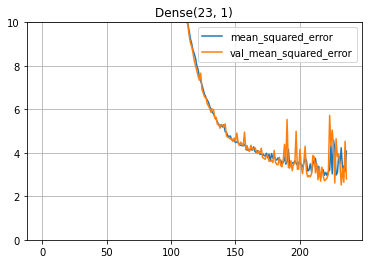

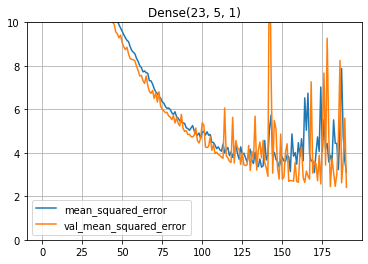

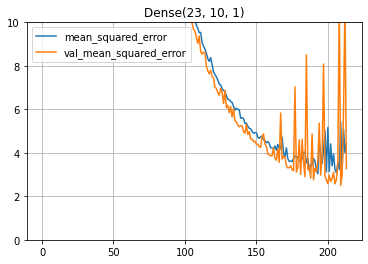

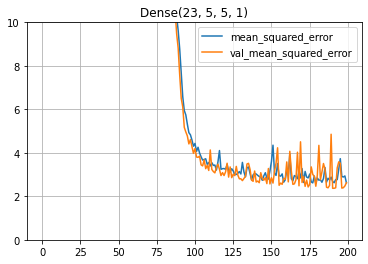

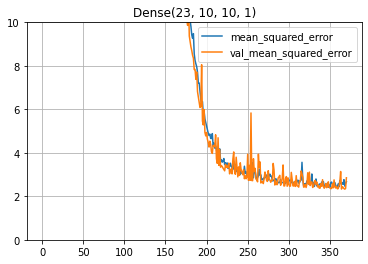

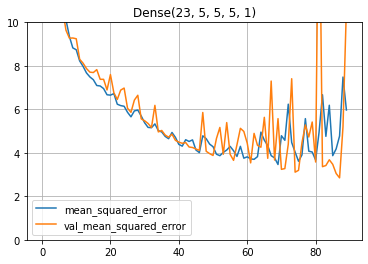

In [82]:
for name, hist in train_hists.items():
    for score in ['mean_squared_error', 'val_mean_squared_error']:
        plt.plot(hist.history[score], label=score)
    plt.grid()
    plt.title(name)
    plt.legend()
    plt.ylim((0, 10))
    plt.show()

In [83]:
from sklearn.metrics import mean_squared_error

In [84]:
for name, model in models.items():
    print(name)
    print(f'mean_squared_error: {mean_squared_error(model.predict(X_test), y_test)}')

Dense(23, 1)
mean_squared_error: 2.8135473199996026
Dense(23, 5, 1)
mean_squared_error: 2.399688775602547
Dense(23, 10, 1)
mean_squared_error: 3.2743170770796257
Dense(23, 5, 5, 1)
mean_squared_error: 2.6114131338762907
Dense(23, 10, 10, 1)
mean_squared_error: 2.8513904206501235
Dense(23, 5, 5, 5, 1)
mean_squared_error: 10.352774002103795
